In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import tushare as ts
import seaborn as sns
import glob
style.use("ggplot")

%matplotlib inline

# 上证50和上证50指数之间涨跌幅之间的相关性

## 下载上证50个股数据

In [6]:
sz50 = ts.get_sz50s()
sz50_code_list = list(sz50['code'])

C:\Users\Brad Sun\Anaconda3\lib\site-packages\tushare\stock\classifying.py:266: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  ct.PAGES['sz50b']), parse_cols=[0, 4, 5])


In [18]:
folder_all = "C:/Users/workspace/brad_public_workspace_on_win/non_code_files_brad_public_workspace_on_win/brad_public_workspace_on_win_non_code_files/SH_tongliang/data/SZ50_daily_data/1998_2019_all_51/"
n = 0
for code in sz50_code_list[48:]:
    cons = ts.get_apis()
#     df = ts.get_hist_data(code)
#     df = df.reset_index()
#     df = df[['date', 'open', 'high', 'low', 'close', 'volume']]
    df = ts.bar(code, conn=cons, freq='D', start_date='1998-01-01', end_date='2019-03-06')
    df.reset_index(inplace=True)
    df = df[['datetime', 'open', 'high', 'low', 'close', 'vol', 'amount']]
    df.columns = ['date', 'open', 'high', 'low', 'close', 'vol', 'amount']
    len_ = len(df)
    n = n+1
    df.to_csv(folder_all+code+"_1998_2019.csv", index = False)
    print ("No.{}, {}的数据量：{}，起始时间: {}".format(n, code, len_, df['date'].values[-1]))

No.1, 603259的数据量：203，起始时间: 2018-05-08T00:00:00.000000000
No.2, 603993的数据量：1537，起始时间: 2012-10-09T00:00:00.000000000


In [19]:
ShangZ50 = ts.get_h_data('000016', index=True, start='1998-01-01', end='2019-03-06') #上证50指数
ShangZ50.reset_index(inplace=True)
ShangZ50 = ShangZ50[['date', 'open', 'high', 'low', 'close', 'volume', 'amount']]
ShangZ50.columns = ['date', 'open', 'high', 'low', 'close', 'vol', 'amount']
ShangZ50.to_csv(folder_all+"000016_1998_2010.csv", index = False)

[Getting data:]###############timed out
############timed out
##################################

In [3]:
def return_ticker(file_name):
    ticker = file_name[:7]
    return ticker

In [2]:
folder_all = "C:/Users/workspace/brad_public_workspace_on_win/non_code_files_brad_public_workspace_on_win/brad_public_workspace_on_win_non_code_files/SH_tongliang/data/SZ50_daily_data/1998_2019_all_51/"
all_csvs = folder_all+"*.csv"

In [4]:
stock_list = []
len_ = 0
for fname in glob.glob(all_csvs)[:]:
#     print (fname)
    stock = pd.read_csv(fname)
    stock = stock.sort_values('date')
    stock = stock[['date','close']]
    stock['pct_chg'] = stock['close'].pct_change()
    ticker = fname[-20:-14]
    stock.columns = ['date', 'close', ticker]
    stock = stock[['date', ticker]].dropna()
    stock['date'] = pd.to_datetime(stock['date'])
#     stock.set_index('date', inplace=True)
    stock_list.append(stock)
    print ("Length of {}: {}".format(ticker, len(stock)))
    print (stock.head(20))
    len_ = len_+len(stock)
    print ("Total length:{}".format(len_))
    print ("===========")

Length of 000016: 3685
           date    000016
3678 2004-01-13 -0.012946
3677 2004-01-14 -0.020521
3676 2004-01-15 -0.005319
3675 2004-01-16  0.009009
3685 2004-01-02 -0.066723
3674 2004-01-29  0.088256
3673 2004-01-30 -0.030030
3684 2004-01-05 -0.006325
3683 2004-01-06  0.014004
3682 2004-01-07  0.009898
3681 2004-01-08  0.015059
3680 2004-01-09 -0.018933
3502 2004-10-11 -0.146580
3501 2004-10-12 -0.022204
3500 2004-10-13 -0.000829
3499 2004-10-14 -0.027886
3498 2004-10-15  0.003307
3497 2004-10-18  0.003348
3496 2004-10-19  0.002567
3495 2004-10-20 -0.006265
Total length:3685
Length of 600000: 4560
           date    600000
4559 1999-11-11 -0.001441
4558 1999-11-12  0.012270
4557 1999-11-15 -0.010695
4556 1999-11-16 -0.043243
4555 1999-11-17  0.023729
4554 1999-11-18 -0.005887
4553 1999-11-19 -0.005181
4552 1999-11-22 -0.015997
4551 1999-11-23  0.000000
4550 1999-11-24 -0.000756
4549 1999-11-25 -0.001135
4548 1999-11-26  0.001894
4547 1999-11-29 -0.004537
4546 1999-11-30  0.002659


Length of 600519: 4175
           date    600519
4174 2001-08-28  0.036850
4173 2001-08-29 -0.013022
4172 2001-08-30  0.019791
4171 2001-08-31 -0.002426
4170 2001-09-03 -0.000540
4169 2001-09-04  0.012706
4168 2001-09-05 -0.000534
4167 2001-09-06 -0.019765
4166 2001-09-07 -0.027793
4165 2001-09-10  0.028587
4164 2001-09-11 -0.011172
4163 2001-09-12 -0.008542
4162 2001-09-13 -0.002501
4161 2001-09-14  0.011424
4160 2001-09-17 -0.012672
4159 2001-09-18  0.011440
4158 2001-09-19  0.018483
4157 2001-09-20 -0.008397
4156 2001-09-21 -0.015023
4155 2001-09-24 -0.000277
Total length:65627
Length of 600547: 3531
           date    600547
3530 2003-08-29 -0.008403
3529 2003-09-01  0.099812
3528 2003-09-02  0.040240
3527 2003-09-03  0.004115
3526 2003-09-04 -0.011475
3525 2003-09-05 -0.023217
3524 2003-09-08  0.006791
3523 2003-09-09 -0.019393
3522 2003-09-10  0.042132
3521 2003-09-11 -0.000825
3520 2003-09-12  0.000826
3519 2003-09-15 -0.014851
3518 2003-09-16  0.017588
3517 2003-09-17 -0.035391

Length of 601229: 560
          date    601229
559 2016-11-17  0.100039
558 2016-11-18  0.074245
557 2016-11-21 -0.057870
556 2016-11-22 -0.002106
555 2016-11-23 -0.005276
554 2016-11-24 -0.035361
553 2016-11-25  0.004032
552 2016-11-28 -0.002921
551 2016-11-29 -0.028561
550 2016-11-30 -0.012439
549 2016-12-01  0.003817
548 2016-12-02 -0.021293
547 2016-12-05  0.002331
546 2016-12-06  0.002713
545 2016-12-07  0.004639
544 2016-12-08  0.010004
543 2016-12-09 -0.001905
542 2016-12-12 -0.046565
541 2016-12-13 -0.017214
540 2016-12-14 -0.000815
Total length:108338
Length of 601288: 2095
           date    601288
2094 2010-07-16 -0.003704
2093 2010-07-19  0.007435
2092 2010-07-20  0.000000
2091 2010-07-21  0.000000
2090 2010-07-22  0.007380
2089 2010-07-23  0.029304
2088 2010-07-26 -0.003559
2087 2010-07-27 -0.007143
2086 2010-07-28  0.021583
2085 2010-07-29 -0.003521
2084 2010-07-30 -0.014134
2083 2010-08-02  0.003584
2082 2010-08-03 -0.025000
2081 2010-08-04  0.000000
2080 2010-08-05 -0.0

Length of 601818: 2056
           date    601818
2055 2010-08-19  0.010929
2054 2010-08-20 -0.005405
2053 2010-08-23 -0.032609
2052 2010-08-24  0.000000
2051 2010-08-25 -0.028090
2050 2010-08-26  0.002890
2049 2010-08-27  0.002882
2048 2010-08-30  0.002874
2047 2010-08-31 -0.025788
2046 2010-09-01  0.023529
2045 2010-09-02  0.000000
2044 2010-09-03  0.008621
2043 2010-09-06  0.019943
2042 2010-09-07 -0.008380
2041 2010-09-08 -0.016901
2040 2010-09-09  0.000000
2039 2010-09-10  0.000000
2038 2010-09-13  0.002865
2037 2010-09-14 -0.005714
2036 2010-09-15 -0.011494
Total length:141488
Length of 601857: 2748
           date    601857
2747 2007-11-06 -0.090309
2746 2007-11-07  0.011003
2745 2007-11-08 -0.055404
2744 2007-11-09 -0.000262
2743 2007-11-12 -0.045312
2742 2007-11-13  0.015912
2741 2007-11-14  0.049959
2740 2007-11-15 -0.024949
2739 2007-11-16  0.024004
2738 2007-11-19 -0.019320
2737 2007-11-20 -0.016548
2736 2007-11-21 -0.016560
2735 2007-11-22 -0.046442
2734 2007-11-23 -0.01481

KeyError: 'date'

In [5]:
def merge_df(df1, df2):
    df1.sort_values('date', inplace = True)
    merged = df1.merge(df2, on = 'date', how = 'outer')
    merged.sort_values('date', inplace = True)
    return merged

In [6]:
from functools import reduce
merged_all = reduce(merge_df, stock_list)

In [7]:
merged_all.set_index('date', inplace=True)

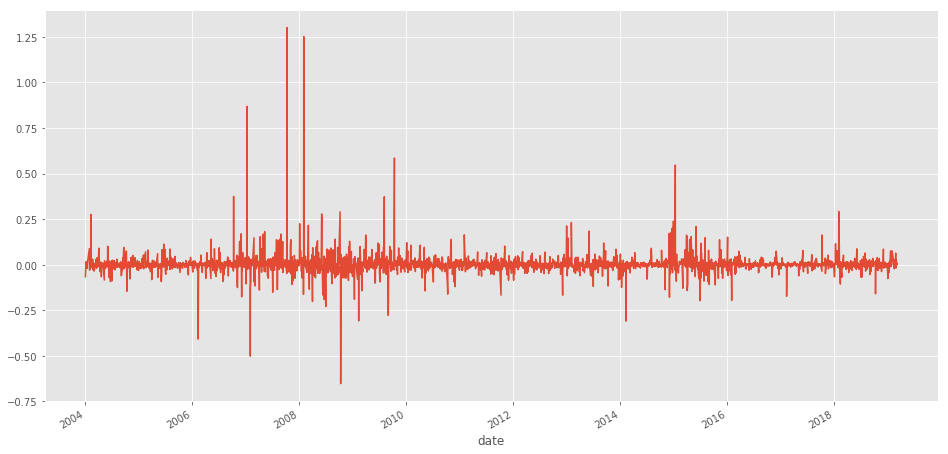

In [8]:
merged_all['000016'].plot(figsize = (16, 8))

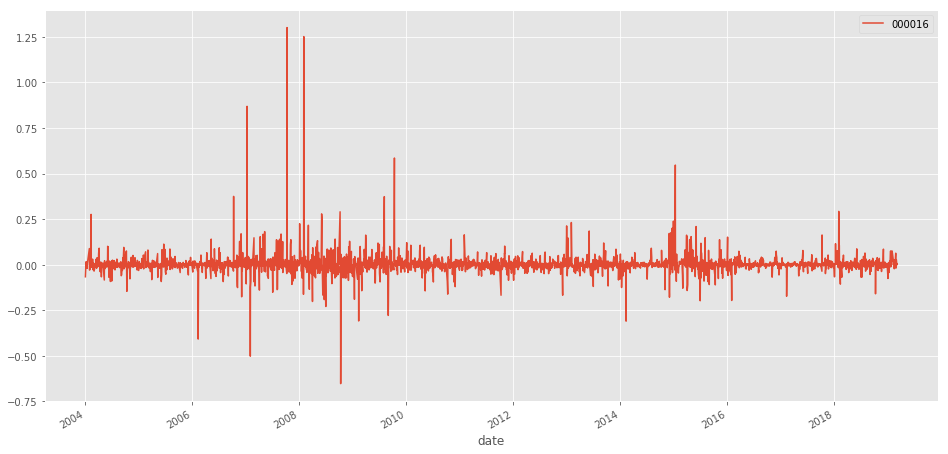

In [9]:
# 用原来的stock_list来检查merged_all
stock_list[0].set_index('date').plot(figsize = (16, 8))

喜欢英语 => 喜欢英文电影和美剧 => 被华尔街系列洗脑 => 迷上金融市场和交易 => 去纽约，进到对冲基金实习 => 发现二级市场交易快要被机器一锅端了.. => 自学量化

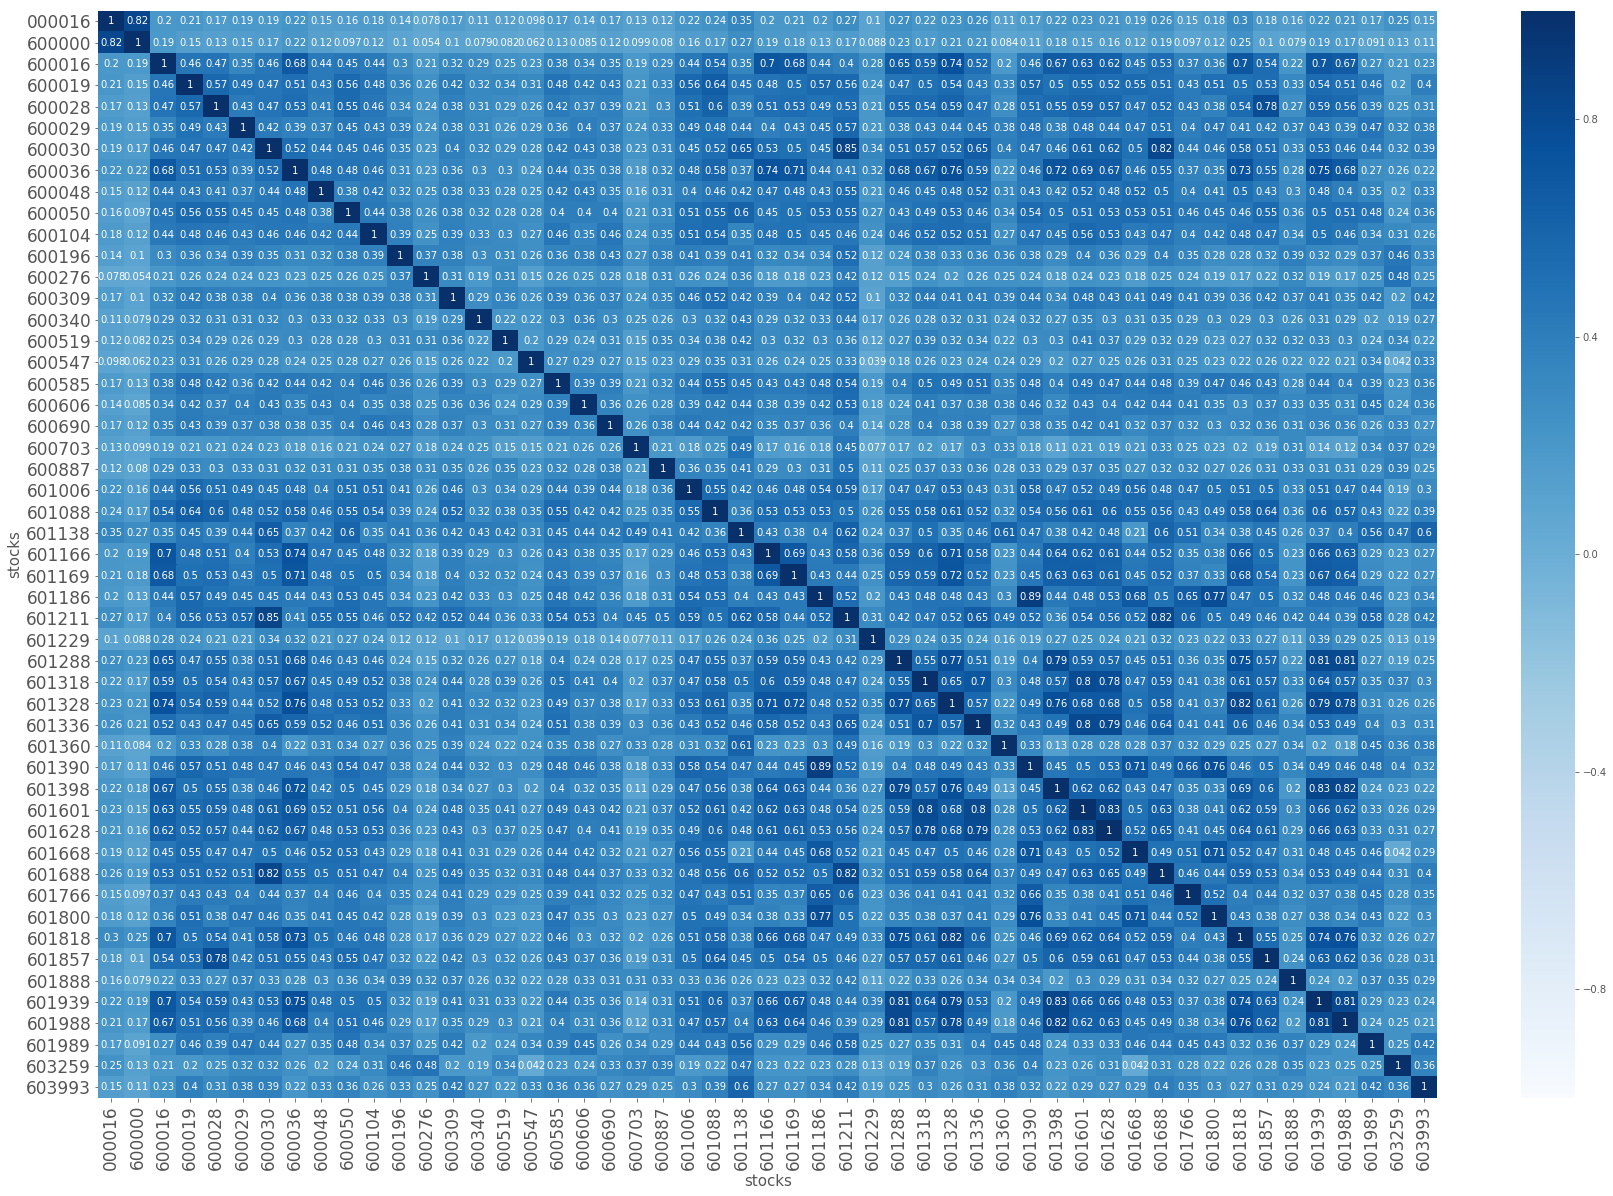

In [10]:
fig, ax = plt.subplots(figsize = (30, 20))
sns.heatmap(merged_all.corr()[abs(merged_all.corr())>-2], ax = ax, cmap = 'Blues', vmax = 1.0, vmin = -1.0, annot=True)
plt.xlabel('stocks', fontsize = 15)
plt.ylabel('stocks', fontsize = 15)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17);

# 给之前的文章配原创图

In [23]:
folder_all = "C:/Users/workspace/brad_public_workspace_on_win/non_code_files_brad_public_workspace_on_win/brad_public_workspace_on_win_non_code_files/SH_tongliang/data/commodities_data/12_28_commodities_daily/"

xom = pd.read_csv(folder_all + "j9000_d.csv")
cvx = pd.read_csv(folder_all + "jm000_d.csv")

xom.columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'turnover']
cvx.columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'turnover']
xom.set_index('date', inplace=True)
cvx.set_index('date', inplace=True)
xom = xom['close'].sort_index()
cvx = cvx['close'].sort_index()

xom_df = pd.DataFrame(xom)
cvx_df = pd.DataFrame(cvx)

xom_df.reset_index(inplace=True)
cvx_df.reset_index(inplace=True)

merged = xom_df.merge(cvx_df, on = 'date')

In [25]:
merged.columns = ['date', 'j9000', 'jm000']

In [26]:
merged

,date,j9000,jm000
0,2013/03/25,1683.0,1259.0
1,2013/03/26,1660.0,1273.0
2,2013/03/27,1658.0,1263.0
3,2013/03/28,1609.0,1261.0
4,2013/03/29,1581.0,1242.0
5,2013/04/01,1570.0,1204.0
6,2013/04/02,1621.0,1230.0
7,2013/04/03,1619.0,1218.0
8,2013/04/08,1635.0,1222.0
9,2013/04/09,1630.0,1225.0


In [27]:
merged['j9000'].pct_change().corr(merged['jm000'].pct_change())

0.8436910674517335

In [28]:
def two_graphs_twinx(series1, series2):
    fig = plt.figure(figsize = (15, 10))
    
    ax1 = fig.add_subplot(1, 1, 1)
    ax2 = ax1.twinx()
    
    series1.plot(ax = ax1, color = 'green', lw = 1.5)
    series2.plot(ax = ax2, color = 'red', lw = 1.5)
    

#     ax1.axhline(0, color = 'blue', linestyle='--', lw=1)
#     ax2.axhline(0, color = 'red', linestyle='--', lw=1)

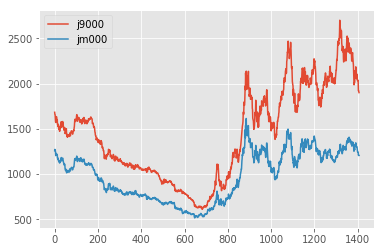

In [29]:
merged.plot()

Text(0.5,1,'2013-3-25 to 2018-12-28 j9000 vs jm000')

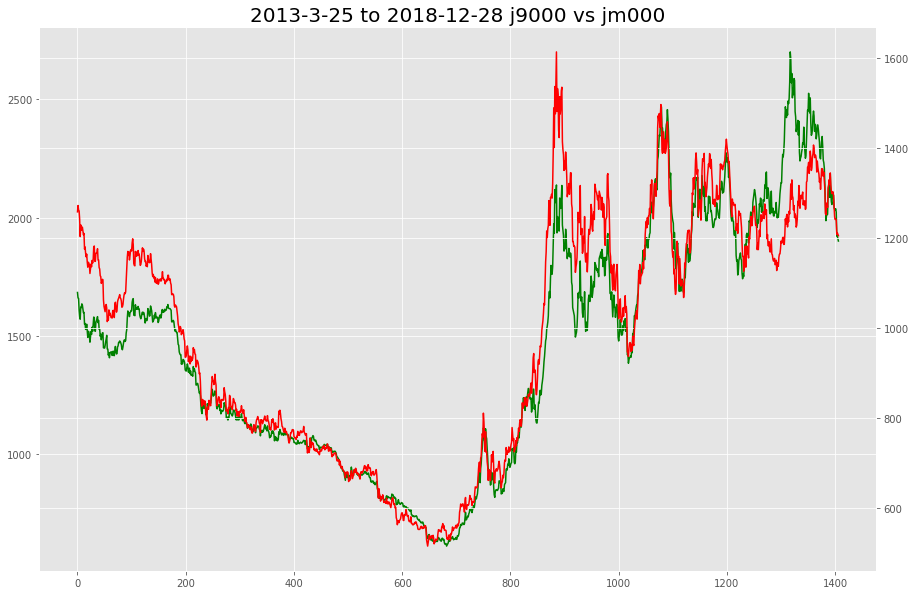

In [32]:
two_graphs_twinx(merged['j9000'], merged['jm000'])
plt.title('2013-3-25 to 2018-12-28 j9000 vs jm000', fontsize = 20)
# plt.legend(['XOM', 'CVX'])